0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=EvenPolynomial(c=0.009217609320846545, cc=0, coefs=[0.0, -3.82177e-07, -6.06486e-11, -3.80172e-15, -1.32266e-18, 0, 0]), interact_mode=transmit)
2 Surface(profile=Spherical(c=-0.0011784809380708267), interact_mode=transmit)
3 Surface(profile=Spherical(c=0.01989970548435883), interact_mode=transmit)
4 Surface(profile=Spherical(c=-0.016469038208168644), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.0004004004004004004), interact_mode=transmit)
6 Surface(profile=Spherical(c=-0.012946827379950543), interact_mode=transmit)
7 Surface(profile=Spherical(c=0.008790204196443482), interact_mode=transmit)
8 Surface(profile=Spherical(c=-0.005616084465910367), interact_mode=transmit)
9 Surface(profile=Spherical(c=0.014152478806662986), interact_mode=transmit)
10 Surface(profile=Spherical(c=-0.000508001016002032), interact_mode=transmit)
11 Surface(profile=Spherical(c=0.003452001643152782), interact_mod

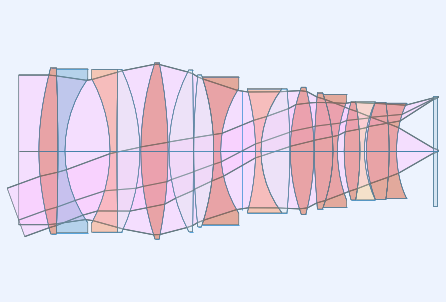

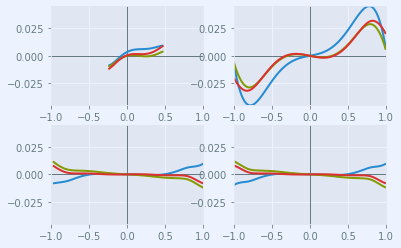

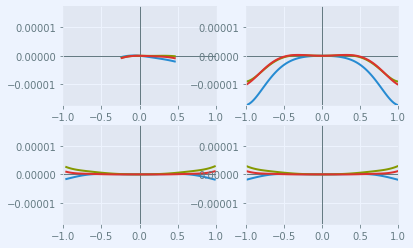

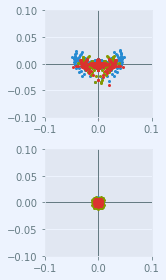

In [1]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# WO2019-229849 Example 1 (Nikkor Z 58mm f/0.95 S)
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

# Surface[1] = type=S radius=108.488 thickness=7.65 diameter = 66.8 nd = 1.90265 vd = 35.77
# Aspheric values[1] = 108.488 0 -3.82177e-07 -6.06486e-11 -3.80172e-15 -1.32266e-18
# Surface[2] = type=S radius=-848.55 thickness=2.8 diameter = 65.82 nd = 1.552981 vd = 55.07
# Surface[3] = type=S radius=50.252 thickness=18.12 diameter = 57.94 nd = 0 vd = 0
# Surface[4] = type=S radius=-60.72 thickness=2.8 diameter = 58.28 nd = 1.61266 vd = 44.46
# Surface[5] = type=S radius=2497.5 thickness=9.15 diameter = 65.32 nd = 1.59319 vd = 67.9
# Surface[6] = type=S radius=-77.239 thickness=0.4 diameter = 65.32 nd = 0 vd = 0
# Surface[7] = type=S radius=113.763 thickness=10.95 diameter = 70.9 nd = 1.8485 vd = 43.79
# Surface[8] = type=S radius=-178.06 thickness=0.4 diameter = 70.9 nd = 0 vd = 0
# Surface[9] = type=S radius=70.659 thickness=9.74 diameter = 65 nd = 1.59319 vd = 67.9
# Surface[10] = type=S radius=-1968.5 thickness=0.2 diameter = 65 nd = 0 vd = 0
# Surface[11] = type=S radius=289.687 thickness=8 diameter = 61.06 nd = 1.59319 vd = 67.9
# Surface[12] = type=S radius=-97.087 thickness=2.8 diameter = 59.42 nd = 1.738 vd = 32.33
# Surface[13] = type=S radius=47.074 thickness=8.7 diameter = 50.24 nd = 0 vd = 0
# Surface[14] = type=AS radius=0 thickness=5.29 diameter = 47.918 nd = 0 vd = 0
# Surface[15] = type=S radius=-95.23 thickness=2.2 diameter = 49.92 nd = 1.61266 vd = 44.46
# Surface[16] = type=S radius=41.204 thickness=11.55 diameter = 49.92 nd = 1.49782 vd = 82.57
# Surface[17] = type=S radius=-273.092 thickness=0.2 diameter = 49.92 nd = 0 vd = 0
# Surface[18] = type=S radius=76.173 thickness=9.5 diameter = 51.12 nd = 1.883 vd = 40.69
# Surface[19] = type=S radius=-101.575 thickness=0.2 diameter = 51.12 nd = 0 vd = 0
# Surface[20] = type=S radius=176.128 thickness=7.45 diameter = 46.8 nd = 1.95375 vd = 32.33
# Aspheric values[20] = 176.128 0 -1.15028e-06 -4.51771e-10 2.7267e-13 -7.66812e-17
# Surface[21] = type=S radius=-67.221 thickness=1.8 diameter = 45.36 nd = 1.738 vd = 32.33
# Surface[22] = type=S radius=55.51 thickness=2.68 diameter = 39.84 nd = 0 vd = 0
# Surface[23] = type=S radius=71.413 thickness=6.35 diameter = 39.46 nd = 1.883 vd = 40.69
# Surface[24] = type=S radius=-115.025 thickness=1.81 diameter = 39.46 nd = 1.69895 vd = 30.13
# Surface[25] = type=S radius=46.943 thickness=0.8 diameter = 39.46 nd = 0 vd = 0
# Surface[26] = type=S radius=55.281 thickness=9.11 diameter = 38.94 nd = 1.883 vd = 40.69
# Surface[27] = type=S radius=-144.041 thickness=3 diameter = 38.28 nd = 1.765538 vd = 46.76
# Surface[28] = type=S radius=52.858 thickness=14.5 diameter = 38.28 nd = 0 vd = 0
# Aspheric values[28] = 52.858 0 3.18645e-06 -1.14718e-08 7.74567e-11 -2.24225e-13 3.3479e-16 -1.7047e-19
# Surface[29] = type=S radius=0 thickness=1.6 diameter = 44.3 nd = 1.5168 vd = 64.14
# Surface[30] = type=S radius=0 thickness=1 diameter = 44.3 nd = 0 vd = 0

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=0.98)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 19.98])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'WO2019-229849 Example 1 (Nikkor Z 58mm f/0.95 S)'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([108.488,7.65,1.90265,35.77])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=108.488, cc=0,
        coefs=[0.0,-3.82177e-07,-6.06486e-11,-3.80172e-15,-1.32266e-18,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 33.4
sm.add_surface([-848.55,2.8,1.55298,55.07])
sm.ifcs[sm.cur_surface].max_aperture = 32.91
sm.add_surface([50.252,18.12])
sm.ifcs[sm.cur_surface].max_aperture = 28.97
sm.add_surface([-60.72,2.8,1.61266,44.46])
sm.ifcs[sm.cur_surface].max_aperture = 29.14
sm.add_surface([2497.5,9.15,1.59319,67.9])
sm.ifcs[sm.cur_surface].max_aperture = 32.66
sm.add_surface([-77.239,0.4])
sm.ifcs[sm.cur_surface].max_aperture = 32.66
sm.add_surface([113.763,10.95,1.8485,43.79])
sm.ifcs[sm.cur_surface].max_aperture = 35.45
sm.add_surface([-178.06,0.4])
sm.ifcs[sm.cur_surface].max_aperture = 35.45
sm.add_surface([70.659,9.74,1.59319,67.9])
sm.ifcs[sm.cur_surface].max_aperture = 32.5
sm.add_surface([-1968.5,0.2])
sm.ifcs[sm.cur_surface].max_aperture = 32.5
sm.add_surface([289.687,8,1.59319,67.9])
sm.ifcs[sm.cur_surface].max_aperture = 30.53
sm.add_surface([-97.087,2.8,1.738,32.33])
sm.ifcs[sm.cur_surface].max_aperture = 29.71
sm.add_surface([47.074,8.7])
sm.ifcs[sm.cur_surface].max_aperture = 25.12
sm.add_surface([0,5.29])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 23.959
sm.add_surface([-95.23,2.2,1.61266,44.46])
sm.ifcs[sm.cur_surface].max_aperture = 24.96
sm.add_surface([41.204,11.55,1.49782,82.57])
sm.ifcs[sm.cur_surface].max_aperture = 24.96
sm.add_surface([-273.092,0.2])
sm.ifcs[sm.cur_surface].max_aperture = 24.96
sm.add_surface([76.173,9.5,1.883,40.69])
sm.ifcs[sm.cur_surface].max_aperture = 25.56
sm.add_surface([-101.575,0.2])
sm.ifcs[sm.cur_surface].max_aperture = 25.56
sm.add_surface([176.128,7.45,1.95375,32.33])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=176.128, cc=0,
        coefs=[0.0,-1.15028e-06,-4.51771e-10,2.7267e-13,-7.66812e-17,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 23.4
sm.add_surface([-67.221,1.8,1.738,32.33])
sm.ifcs[sm.cur_surface].max_aperture = 22.68
sm.add_surface([55.51,2.68])
sm.ifcs[sm.cur_surface].max_aperture = 19.92
sm.add_surface([71.413,6.35,1.883,40.69])
sm.ifcs[sm.cur_surface].max_aperture = 19.73
sm.add_surface([-115.025,1.81,1.69895,30.13])
sm.ifcs[sm.cur_surface].max_aperture = 19.73
sm.add_surface([46.943,0.8])
sm.ifcs[sm.cur_surface].max_aperture = 19.73
sm.add_surface([55.281,9.11,1.883,40.69])
sm.ifcs[sm.cur_surface].max_aperture = 19.47
sm.add_surface([-144.041,3,1.76554,46.76])
sm.ifcs[sm.cur_surface].max_aperture = 19.14
sm.add_surface([52.858,14.5])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=52.858, cc=0,
        coefs=[0.0,3.18645e-06,-1.14718e-08,7.74567e-11,-2.24225e-13,3.3479e-16,-1.7047e-19])
sm.ifcs[sm.cur_surface].max_aperture = 19.14
sm.add_surface([0,1.6,1.5168,64.14])
sm.ifcs[sm.cur_surface].max_aperture = 22.15
sm.add_surface([0,1])
sm.ifcs[sm.cur_surface].max_aperture = 22.15
sm.list_surfaces()
sm.list_gaps()
sm.do_apertures = False
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()